In [25]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# Import the requests library.
import requests

# Import the API key.
from Config import weather_api_key

In [27]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1236d72e3af1ad06cadf6957fd83154d


In [28]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [29]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [30]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [31]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [32]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

592

In [33]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [34]:

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | ngunguru
Processing Record 2 of Set 1 | alofi
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | carnarvon
Processing Record 6 of Set 1 | itarema
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | darnah
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | ilhabela
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | dillon
Processing Record 15 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 16 of Set 1 | vardo
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | wrzesnia
Processing Record 19 of Set 1 | laguna
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | qaanaaq
Processing Record 22 of Set 1 | east london
Processing Record 23 of Set 1 | hanyang
Processing Record 24 of Set 1 | ma

Processing Record 37 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 38 of Set 4 | lazurne
Processing Record 39 of Set 4 | saint anthony
Processing Record 40 of Set 4 | new norfolk
Processing Record 41 of Set 4 | westport
Processing Record 42 of Set 4 | hailar
Processing Record 43 of Set 4 | saskylakh
Processing Record 44 of Set 4 | cockburn town
Processing Record 45 of Set 4 | la solana
Processing Record 46 of Set 4 | tafresh
Processing Record 47 of Set 4 | huanren
Processing Record 48 of Set 4 | bur gabo
City not found. Skipping...
Processing Record 49 of Set 4 | thompson
Processing Record 50 of Set 4 | khatanga
Processing Record 1 of Set 5 | cherskiy
Processing Record 2 of Set 5 | imbituba
Processing Record 3 of Set 5 | pisco
Processing Record 4 of Set 5 | helena
Processing Record 5 of Set 5 | beidao
Processing Record 6 of Set 5 | burns lake
Processing Record 7 of Set 5 | ixtapa
Processing Record 8 of Set 5 | olafsvik
Processing Record 9 of Set 5 | lorengau
Proc

Processing Record 28 of Set 8 | pontal do parana
Processing Record 29 of Set 8 | bogande
Processing Record 30 of Set 8 | campbell river
Processing Record 31 of Set 8 | kavaratti
Processing Record 32 of Set 8 | ambilobe
Processing Record 33 of Set 8 | mosquera
Processing Record 34 of Set 8 | brigantine
Processing Record 35 of Set 8 | xuddur
Processing Record 36 of Set 8 | hualmay
Processing Record 37 of Set 8 | ostrovnoy
Processing Record 38 of Set 8 | sinnamary
Processing Record 39 of Set 8 | panguna
Processing Record 40 of Set 8 | atocha
Processing Record 41 of Set 8 | kitimat
Processing Record 42 of Set 8 | nouadhibou
Processing Record 43 of Set 8 | turukhansk
Processing Record 44 of Set 8 | chara
Processing Record 45 of Set 8 | kawalu
Processing Record 46 of Set 8 | lalmanir hat
City not found. Skipping...
Processing Record 47 of Set 8 | bambous virieux
Processing Record 48 of Set 8 | balotra
Processing Record 49 of Set 8 | quyquyho
City not found. Skipping...
Processing Record 50 o

Processing Record 16 of Set 12 | tchibanga
Processing Record 17 of Set 12 | chapleau
Processing Record 18 of Set 12 | ohara
Processing Record 19 of Set 12 | mecca
Processing Record 20 of Set 12 | kinshasa
Processing Record 21 of Set 12 | gaya
Processing Record 22 of Set 12 | okakarara
Processing Record 23 of Set 12 | klaipeda
Processing Record 24 of Set 12 | mount pleasant
Processing Record 25 of Set 12 | temaraia
City not found. Skipping...
Processing Record 26 of Set 12 | abu kamal
Processing Record 27 of Set 12 | trinidad
Processing Record 28 of Set 12 | dingle
Processing Record 29 of Set 12 | ust-maya
Processing Record 30 of Set 12 | sabang
Processing Record 31 of Set 12 | xining
Processing Record 32 of Set 12 | ancud
Processing Record 33 of Set 12 | togur
Processing Record 34 of Set 12 | gua musang
Processing Record 35 of Set 12 | el ocotito
Processing Record 36 of Set 12 | kendari
Processing Record 37 of Set 12 | wenling
Processing Record 38 of Set 12 | saint-francois
Processing 

In [36]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ngunguru,-35.6167,174.5000,67.15,81,100,11.45,NZ,2021-10-06 03:25:22
1,Alofi,-19.0595,-169.9187,80.49,69,40,9.22,NU,2021-10-06 03:25:22
2,Butaritari,3.0707,172.7902,82.36,68,10,12.57,KI,2021-10-06 03:25:22
3,Atuona,-9.8000,-139.0333,78.53,75,12,20.51,PF,2021-10-06 03:25:22
4,Carnarvon,-24.8667,113.6333,71.67,43,5,24.16,AU,2021-10-06 03:25:23
5,Itarema,-2.9248,-39.9167,78.73,82,85,15.95,BR,2021-10-06 03:25:24
6,Ushuaia,-54.8000,-68.3000,38.86,65,0,4.61,AR,2021-10-06 03:25:06
7,Rikitea,-23.1203,-134.9692,73.45,80,86,21.34,PF,2021-10-06 03:23:13
8,Darnah,32.7670,22.6367,70.86,67,0,19.75,LY,2021-10-06 03:25:25
9,Punta Arenas,-53.1500,-70.9167,42.91,61,0,14.97,CL,2021-10-06 03:22:00


In [37]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ngunguru,NZ,2021-10-06 03:25:22,-35.6167,174.5000,67.15,81,100,11.45
1,Alofi,NU,2021-10-06 03:25:22,-19.0595,-169.9187,80.49,69,40,9.22
2,Butaritari,KI,2021-10-06 03:25:22,3.0707,172.7902,82.36,68,10,12.57
3,Atuona,PF,2021-10-06 03:25:22,-9.8000,-139.0333,78.53,75,12,20.51
4,Carnarvon,AU,2021-10-06 03:25:23,-24.8667,113.6333,71.67,43,5,24.16
5,Itarema,BR,2021-10-06 03:25:24,-2.9248,-39.9167,78.73,82,85,15.95
6,Ushuaia,AR,2021-10-06 03:25:06,-54.8000,-68.3000,38.86,65,0,4.61
7,Rikitea,PF,2021-10-06 03:23:13,-23.1203,-134.9692,73.45,80,86,21.34
8,Darnah,LY,2021-10-06 03:25:25,32.7670,22.6367,70.86,67,0,19.75
9,Punta Arenas,CL,2021-10-06 03:22:00,-53.1500,-70.9167,42.91,61,0,14.97


In [42]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [43]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [46]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1633492756.122953

In [47]:
today = time.strftime("%x")
today

'10/05/21'

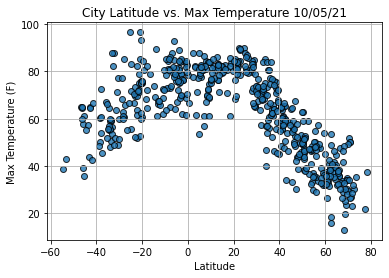

In [48]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

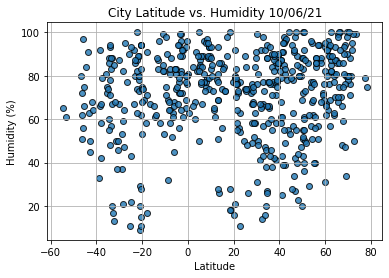

In [49]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

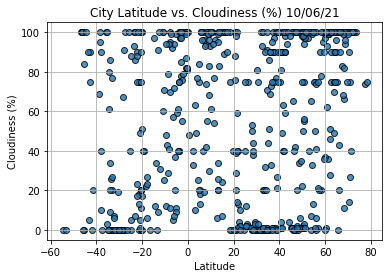

In [50]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

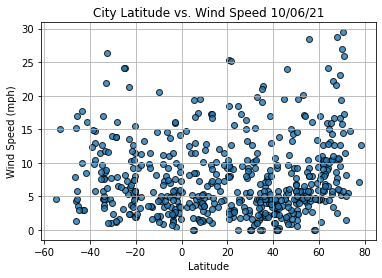

In [52]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [56]:
# Import linregress
from scipy.stats import linregress

In [57]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [58]:
index13 = city_data_df.loc[13]
index13

City                       Dillon
Country                        US
Date          2021-10-06 03:24:34
Lat                       34.4166
Lng                      -79.3712
Max Temp                    73.38
Humidity                       88
Cloudiness                     91
Wind Speed                   5.57
Name: 13, dtype: object

In [59]:
city_data_df["Lat"] >=0

0      False
1      False
2       True
3      False
4      False
       ...  
537     True
538     True
539    False
540     True
541     True
Name: Lat, Length: 542, dtype: bool

In [60]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Butaritari,KI,2021-10-06 03:25:22,3.0707,172.7902,82.36,68,10,12.57
8,Darnah,LY,2021-10-06 03:25:25,32.7670,22.6367,70.86,67,0,19.75
13,Dillon,US,2021-10-06 03:24:34,34.4166,-79.3712,73.38,88,91,5.57
14,Vardo,NO,2021-10-06 03:25:26,70.3705,31.1107,52.00,80,14,29.46
15,Yellowknife,CA,2021-10-06 03:22:39,62.4560,-114.3525,39.42,100,75,5.75


In [61]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

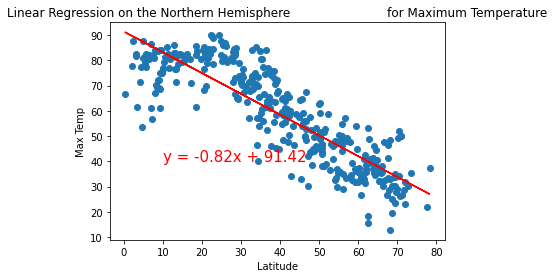

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

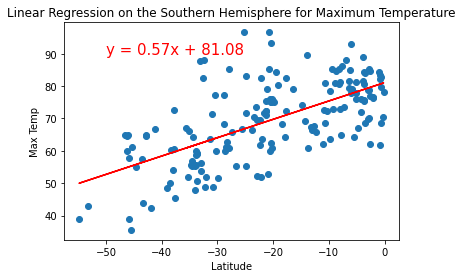

In [64]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

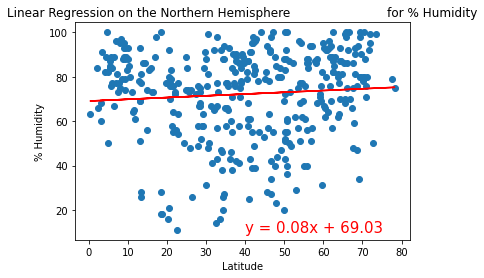

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

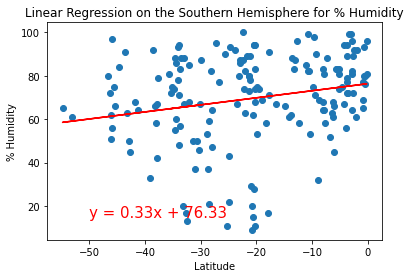

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

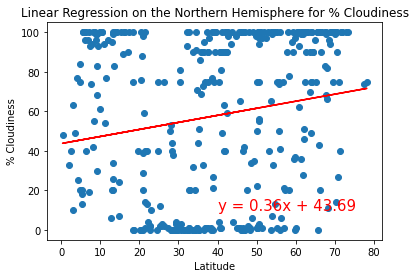

In [73]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

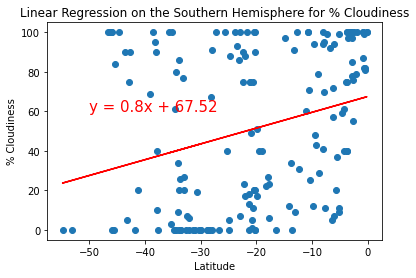

In [76]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

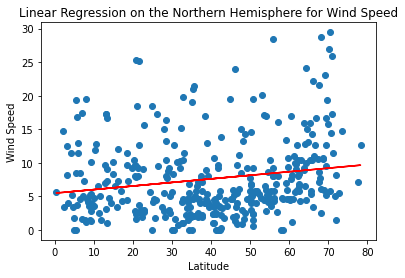

In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

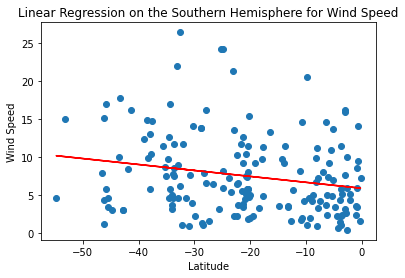

In [78]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))